<a href="https://colab.research.google.com/github/JulieaMammen/Education-Inequality/blob/main/JulieMammen_DATA_3320_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is to perform in-depth analysis of the cleaned data previously prepared of the EdGap and School Information data sets in order to answer the question of whether socioeconomic factors play a role in school performance.

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Import additional libraries
from itertools import combinations
from math import comb

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/JulieaMammen/Education-Inequality/main/clean_edgap_school_info%20(2).csv')

##### $\rightarrow$ Review the contents of the data set.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5781 non-null   float64
 1   percent_college    5781 non-null   float64
 2   percent_lunch      5781 non-null   float64
 3   percent_married    5781 non-null   float64
 4   rate_unemployment  5781 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   int64  
 10  average_act        5781 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 496.9+ KB


Through viewing the contents of this data set, we ensure that there are no NaN values remaining in the data frame, meaning we can go ahead and proceed with starting to analyze what this data is telling us.

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


What factors seem to have the largest impact in regards to average school ACT performance?
  - Household income, unemployment, education levels, in a married couple family
  - We can analyze these variables one by one in order to determine if one factor impacts school performance more than others.

Does location play a role in average school ACT performance in relation to the socioeconomic factors?

## Analysis

First, we can start by making a plot in order to explore the relationships between the key predictors in this data set: median_income, percent_college, percent_married, percent_lunch, and rate_unemployment.

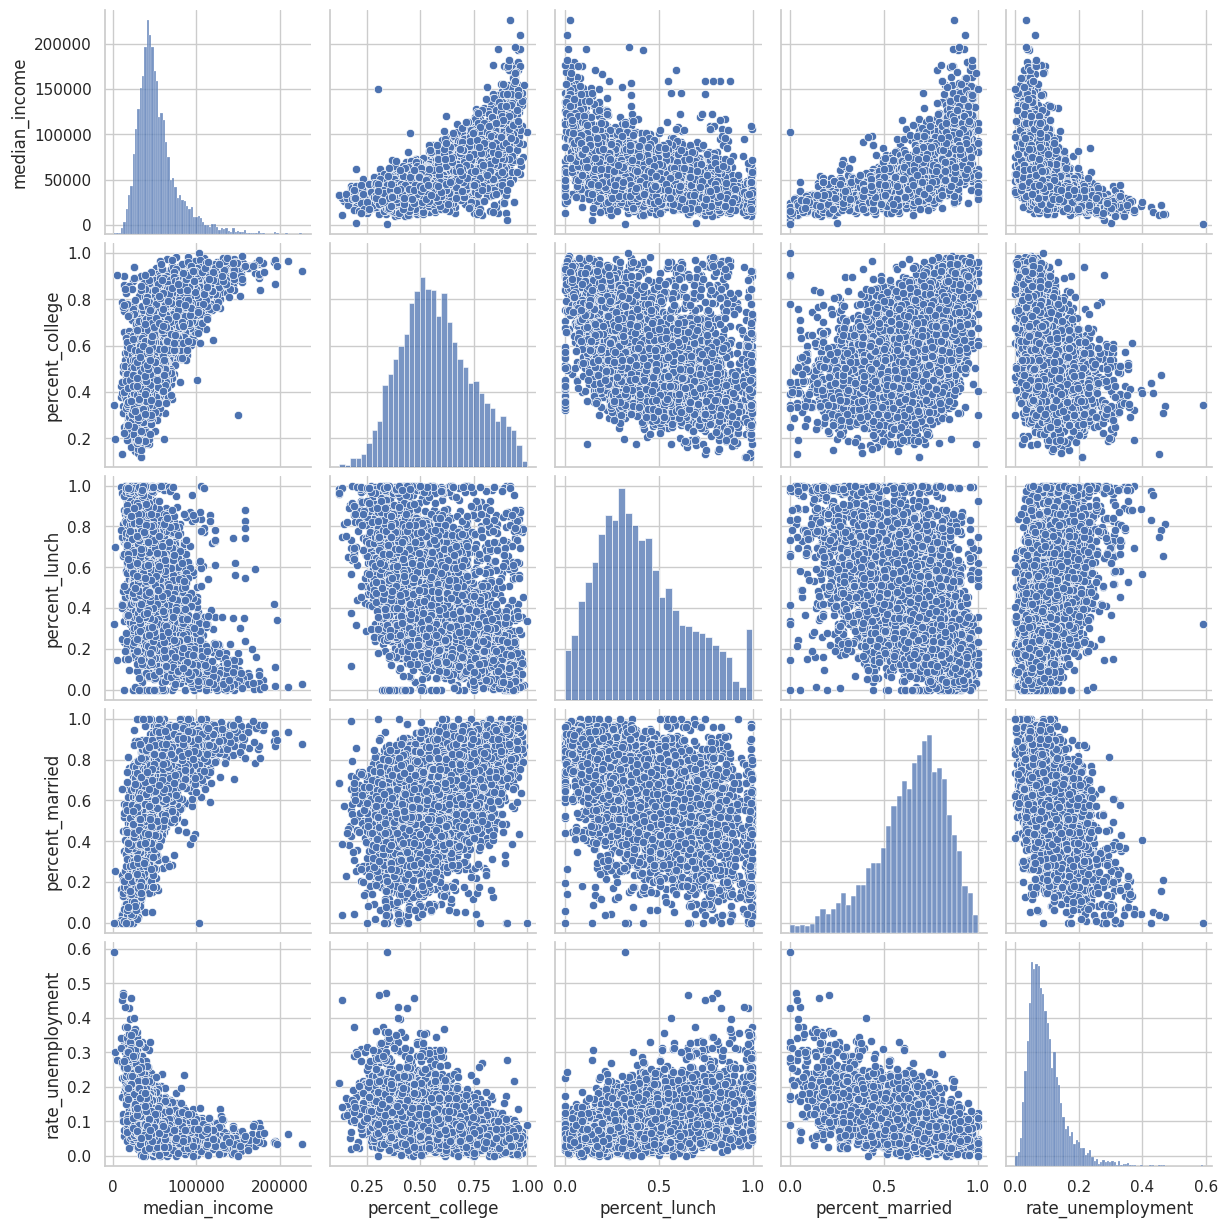

In [8]:
sns.pairplot(data = df.loc[:,['median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment']])

Now from this pairplot, we can create a correlation matrix to further explore the relationships between these five variables.

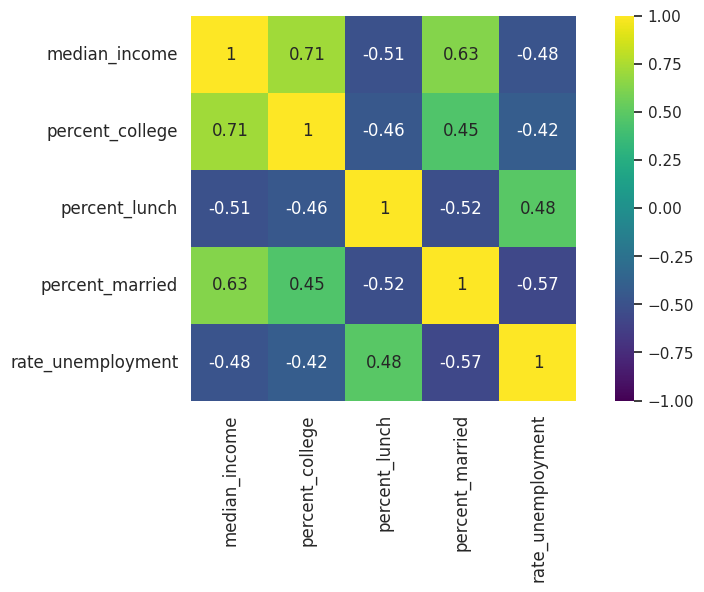

In [9]:
corr_matrix = df.loc[:,['median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

## Single Input Models

Now we can plot regression lines to fit and assess models prediction the average_act from individual predictors.

First, we can look at the median income in relationship to average ACT score.

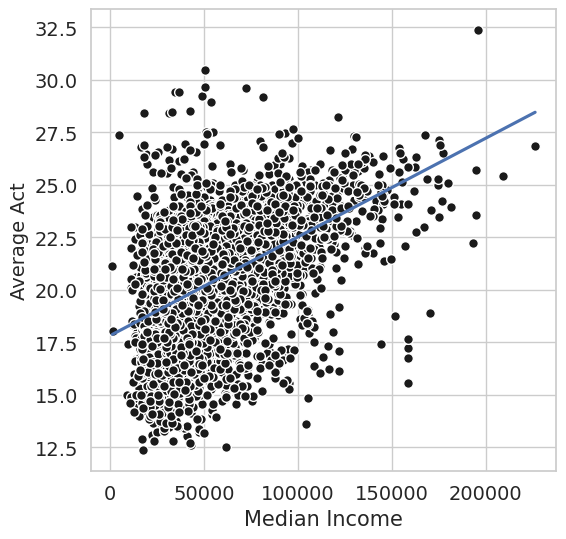

In [10]:
plt.figure(figsize=(6,6))

plt.plot(df['median_income'], df['average_act'], 'ko', mec = 'w', ms = 7)

sns.regplot(data=df, x ='median_income', y = 'average_act', order=1, scatter=False, ci=None)

plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('Average Act', fontsize = 14)

plt.tick_params(labelsize=14)

In [11]:
model = smf.ols(formula='average_act ~ median_income', data = df).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1581.
Date:                Fri, 05 May 2023   Prob (F-statistic):          6.93e-306
Time:                        19:32:56   Log-Likelihood:                -12846.
No. Observations:                5781   AIC:                         2.570e+04
Df Residuals:                    5779   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8147      0.069    256.723

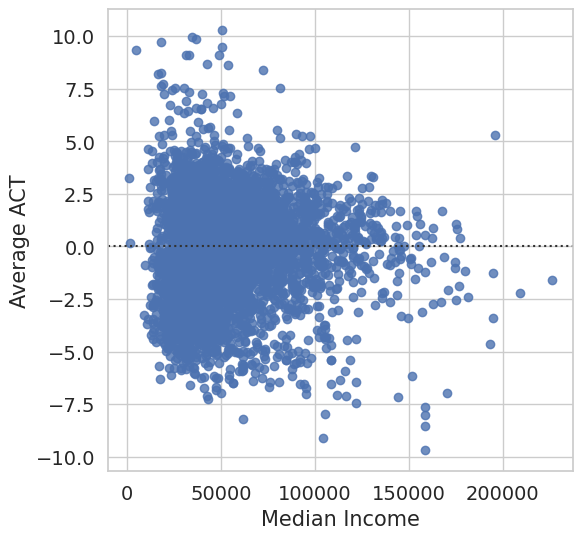

In [13]:
plt.figure(figsize=(6,6))

sns.residplot(data=df, x = 'median_income', y = 'average_act')

plt.xlabel('Median Income', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)
plt.tick_params(labelsize=14)

This residual plot, however, doesn't suggest a quadratic fit being potentially better.

Now, we'll look at percent_college in relationship to average ACT score.

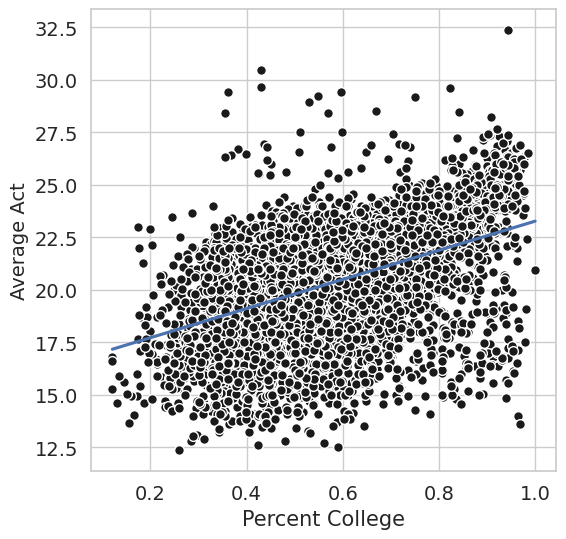

In [14]:
plt.figure(figsize=(6,6))

plt.plot(df['percent_college'], df['average_act'], 'ko', mec = 'w', ms = 7)

sns.regplot(data=df, x ='percent_college', y = 'average_act', order=1, scatter=False, ci=None)

plt.xlabel('Percent College', fontsize = 15)
plt.ylabel('Average Act', fontsize = 14)

plt.tick_params(labelsize=14)

In [15]:
model1 = smf.ols(formula='average_act ~ percent_college', data = df).fit()

In [16]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1520.
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.99e-295
Time:                        19:32:57   Log-Likelihood:                -12870.
No. Observations:                5781   AIC:                         2.574e+04
Df Residuals:                    5779   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3351      0.106    1

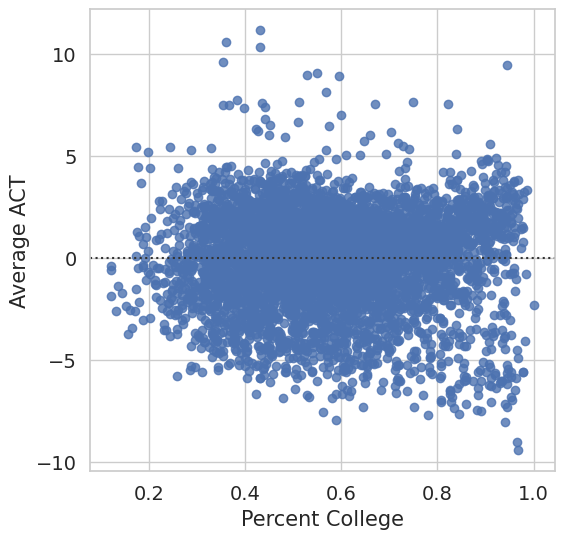

In [17]:
plt.figure(figsize=(6,6))

sns.residplot(data=df, x = 'percent_college', y = 'average_act')

plt.xlabel('Percent College', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)
plt.tick_params(labelsize=14)

This residual plot doesn't insinuate that a quadratic model may fit better.



Now we can look at  percent_lunch in relationship to average act score.

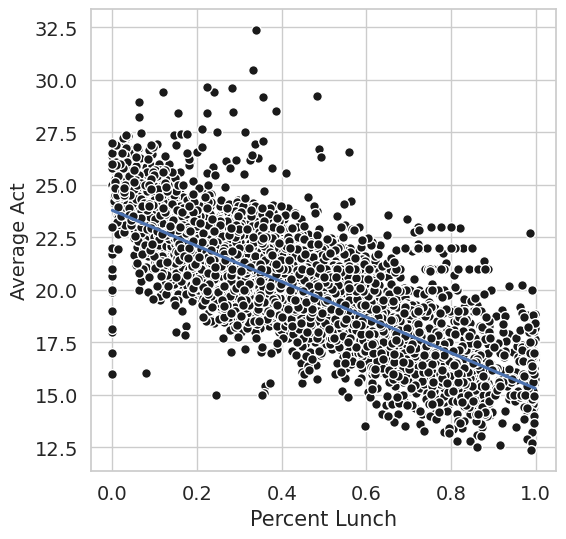

In [18]:
plt.figure(figsize=(6,6))

plt.plot(df['percent_lunch'], df['average_act'], 'ko', mec = 'w', ms = 7)

sns.regplot(data=df, x ='percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)

plt.xlabel('Percent Lunch', fontsize = 15)
plt.ylabel('Average Act', fontsize = 14)

plt.tick_params(labelsize=14)

In [19]:
model2 = smf.ols(formula='average_act ~ percent_lunch', data = df).fit()

In [20]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9407.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:32:59   Log-Likelihood:                -10753.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7861      0.041    577.051

We can see from this model summary that the regression line for percent_lunch has the largest R-squared value compared to the others. A value of 0.619 indicates significance to the data and that the regression line is a good fit for the data. Therefore, it might be worth exploring more in percent_lunch effects, or viewing it that percent_lunch might have the largest correlation in regards to average ACT score.

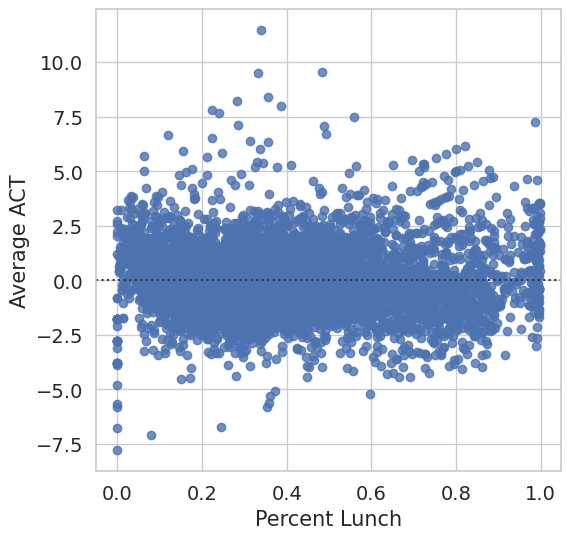

In [21]:
plt.figure(figsize=(6,6))

sns.residplot(data=df, x = 'percent_lunch', y = 'average_act')

plt.xlabel('Percent Lunch', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)
plt.tick_params(labelsize=14)

This residual plot, however, doesn't suggest a quadratic fit being potentially better.

Now, we can look at percent_married in relationship to average_act.

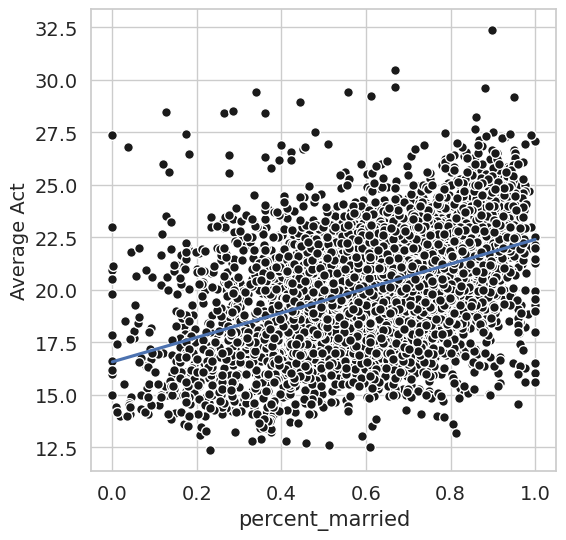

In [22]:
plt.figure(figsize=(6,6))

plt.plot(df['percent_married'], df['average_act'], 'ko', mec = 'w', ms = 7)

sns.regplot(data=df, x ='percent_married', y = 'average_act', order=1, scatter=False, ci=None)

plt.xlabel('percent_married', fontsize = 15)
plt.ylabel('Average Act', fontsize = 14)

plt.tick_params(labelsize=14)

In [23]:
model3 = smf.ols(formula='average_act ~ percent_married', data = df).fit()

In [24]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1402.
Date:                Fri, 05 May 2023   Prob (F-statistic):          7.60e-275
Time:                        19:33:00   Log-Likelihood:                -12918.
No. Observations:                5781   AIC:                         2.584e+04
Df Residuals:                    5779   BIC:                         2.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5734      0.104    1

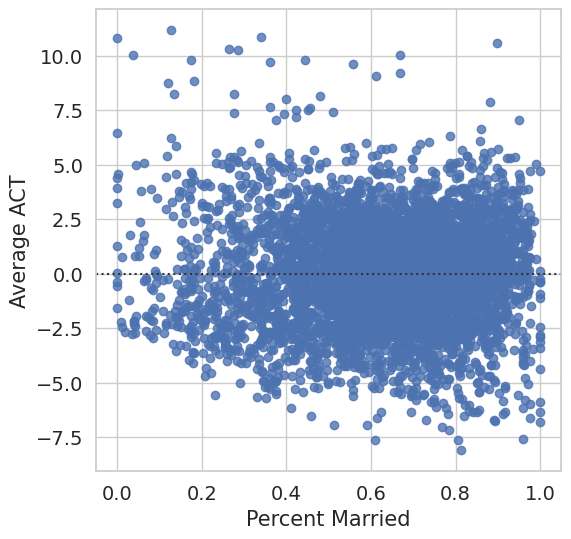

In [25]:
plt.figure(figsize=(6,6))

sns.residplot(data=df, x = 'percent_married', y = 'average_act')

plt.xlabel('Percent Married', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)
plt.tick_params(labelsize=14)

This residual plot, however, doesn't suggest a quadratic fit being potentially better.

Lastly, let's look at rate_unemployment in relationship to average_act.

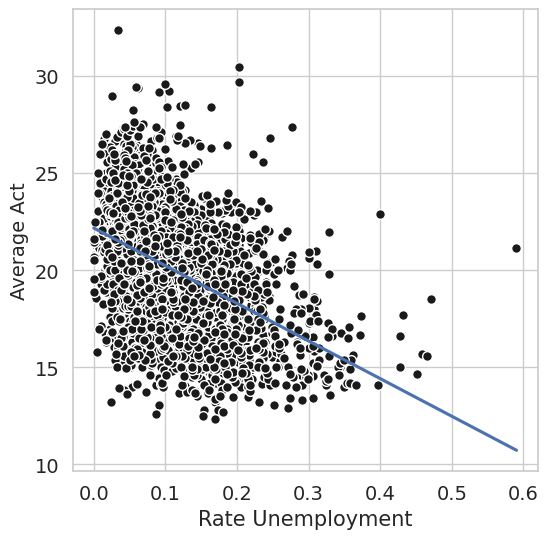

In [26]:
plt.figure(figsize=(6,6))

plt.plot(df['rate_unemployment'], df['average_act'], 'ko', mec = 'w', ms = 7)

sns.regplot(data=df, x ='rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None)

plt.xlabel('Rate Unemployment', fontsize = 15)
plt.ylabel('Average Act', fontsize = 14)

plt.tick_params(labelsize=14)

In [27]:
model4 = smf.ols(formula='average_act ~ rate_unemployment', data = df).fit()

In [28]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1363.
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.30e-268
Time:                        19:33:01   Log-Likelihood:                -12933.
No. Observations:                5781   AIC:                         2.587e+04
Df Residuals:                    5779   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1765      0.05

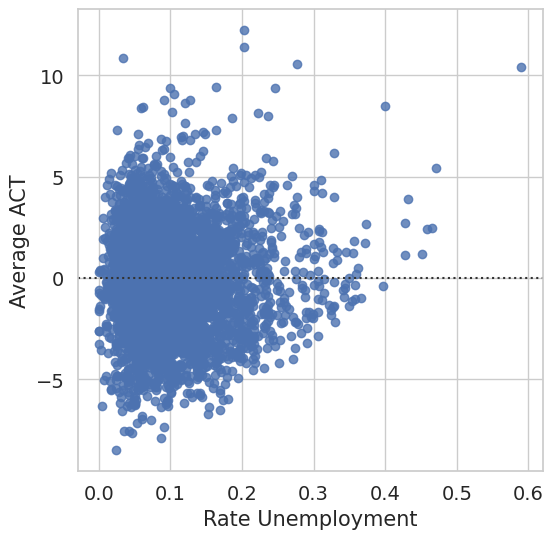

In [29]:
plt.figure(figsize=(6,6))

sns.residplot(data=df, x = 'rate_unemployment', y = 'average_act')

plt.xlabel('Rate Unemployment', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)
plt.tick_params(labelsize=14)

This residual plot, however, doesn't suggest a quadratic fit being potentially better.

## Multiple Input Models

Now we can fit a model using all five predictors in relationship to average_act

In [30]:
model = smf.ols(formula='average_act ~ median_income + percent_college + percent_lunch + percent_married + rate_unemployment', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:01   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7774      0.15

From this model, we can see that there is a relatively large R squared value, indicates doing a good job of fitting the model to the training data.

Furthermore, analysis of the P values highlights some predictors that may not be extremely useful. 

Median_income has a p value of 0.425 and percent_married with 0.522, with large values that suggest they are not a significant fit to the model.

We can now try to preprocess the data.

We can define the matrix of predictor variables, X, and define the output variable, y.

In [31]:
X = df[df.columns.difference(['id','average_act', 'school_level', 'school_type', 'state', 'zip_code', 'year'])]
y = df['average_act']

In [32]:
X.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment
0,41793.0,0.602419,0.542056,0.574034,0.111111
1,38173.0,0.469225,0.339655,0.711429,0.135246
2,39635.0,0.567361,0.270175,0.694514,0.083419
3,40978.0,0.467614,0.315556,0.766901,0.062531
4,36875.0,0.604470,0.548410,0.803435,0.071429


Now we define a scaler using only the training data, and scale the predictor variables in the training set to have a mean of 0 and standard deviation of 1

In [33]:
scaler = StandardScaler().fit(X)

In [34]:
print(scaler.mean_, scaler.scale_)

[5.31344224e+04 5.73698720e-01 4.09149187e-01 6.42301833e-01
 9.60258686e-02] [2.48207618e+04 1.65762467e-01 2.33733684e-01 1.91106416e-01
 5.67731806e-02]


In [35]:
Z = scaler.transform(X)

In [36]:
print(np.mean(Z, axis = 0).round(3))
print(np.std(Z, axis = 0))

[-0. -0. -0. -0.  0.]
[1. 1. 1. 1. 1.]


Now we fit the multiple linear regression model with the scaled input variables.

In [37]:
model_z2 = sm.OLS(y, sm.add_constant(Z)).fit()

In [38]:
print(model_z2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:01   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3148      0.020   1010.244      0.0

## Best Subset Selection Algorithm

In [42]:
X = df[df.columns.difference(['id','average_act', 'school_level', 'school_type', 'state', 'zip_code', 'year'])]
y = df['average_act']

In [43]:
variable_names = X.columns.values

In [44]:
variable_names

array(['median_income', 'percent_college', 'percent_lunch',
       'percent_married', 'rate_unemployment'], dtype=object)

In [45]:
subset = combinations(variable_names, 2)

for n, names in enumerate(subset):
  print(names)

('median_income', 'percent_college')
('median_income', 'percent_lunch')
('median_income', 'percent_married')
('median_income', 'rate_unemployment')
('percent_college', 'percent_lunch')
('percent_college', 'percent_married')
('percent_college', 'rate_unemployment')
('percent_lunch', 'percent_married')
('percent_lunch', 'rate_unemployment')
('percent_married', 'rate_unemployment')


In [46]:
names

('percent_married', 'rate_unemployment')

In [47]:
predictors = X.loc[:,names]
predictors.head()

,percent_married,rate_unemployment
0,0.574034,0.111111
1,0.711429,0.135246
2,0.694514,0.083419
3,0.766901,0.062531
4,0.803435,0.071429


In [48]:
model = sm.OLS(y, sm.add_constant(predictors)).fit() 

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     943.1
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:02   Log-Likelihood:                -12729.
No. Observations:                5781   AIC:                         2.546e+04
Df Residuals:                    5778   BIC:                         2.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.0637      0.16

In [50]:
model.rsquared_adj

0.24585279358667755

In [51]:
model.aic

25463.147796006127

In [52]:
variable_names

array(['median_income', 'percent_college', 'percent_lunch',
       'percent_married', 'rate_unemployment'], dtype=object)

In [53]:
best_subs = (('',), 0.0, 123456.0)

for k in range(1, 6):
  subset = combinations(variable_names, k)
  best_this = (('',), 0.0, 0.0)
  for n, names in enumerate(subset):
    selec = df.loc[:, names]
    model = sm.OLS(df['average_act'], sm.add_constant(selec)).fit()
    if(model.rsquared > best_this[1]):
      best_this = (names, model.rsquared, model.bic)
  if (best_this[2] < best_subs[2]):
    best_subs = best_this

In [54]:
best_subs

(('percent_college', 'percent_lunch', 'rate_unemployment'),
 0.6321195252567744,
 21344.025508862585)

The predictors that would be the most helpful in this analysis would be percent_college, percent_lunch, and rate_unemployment.

When analyzing the single regression lines of percent_college, percent_lunch, and rate_unemployment, we can see that percent_lunch has the largest r squared value, followed by percent_college, and lastly rate_unemployment. 

## Prediction

We can use a prediction of the model to see a plot of the relationship between the predictors and average ACT score.

In [55]:
model_pred = smf.ols(formula='average_act ~ percent_college + percent_lunch + rate_unemployment', data=df).fit()

print(model_pred.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:02   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7261      0.11

In [56]:
y_pred = model_pred.predict()

From the multiple linear regression, we can use this function to store the prediction, and then plot it out against the average_act scores.

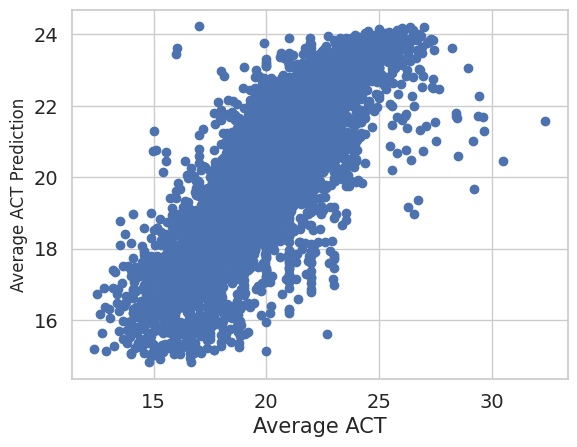

In [57]:
plt.plot(df['average_act'], y_pred, 'o')

plt.xlabel('Average ACT', fontsize=15)
plt.ylabel('Average ACT Prediction')
plt.tick_params(labelsize=14)

In [58]:
pred_df = df[df.columns.difference(['id', 'school_level', 'school_type', 'state', 'zip_code', 'year', 'median_income', 'percent_married'])]

pred_df

,average_act,percent_college,percent_lunch,rate_unemployment
0,16.538462,0.602419,0.542056,0.111111
1,20.367521,0.469225,0.339655,0.135246
2,20.347985,0.567361,0.270175,0.083419
3,21.600000,0.467614,0.315556,0.062531
4,21.056166,0.604470,0.548410,0.071429
...,...,...,...,...
5776,20.500000,0.856123,0.422204,0.051796
5777,22.667888,0.680765,0.116299,0.078612
5778,21.666667,0.514231,0.376812,0.087302
5779,21.251526,0.685942,0.386139,0.084932


In [59]:
model_4 = smf.ols(formula='average_act ~ percent_college + percent_lunch + rate_unemployment', data = pred_df).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:03   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7261      0.11

We can see from the data containing the best predictors, determined by the best subset selection algorithm, that this is still a really good fit for the data as it has a relatively large r-squared value.

## Scaling 

We will create z scores for inputs and compare the coefficients.

In [60]:
df['college_z'] = (df['percent_college'] - np.mean(df['percent_college']))/np.std(df['percent_college'], ddof=1)

In [61]:
df['lunch_z'] = (df['percent_lunch'] - np.mean(df['percent_lunch']))/np.std(df['percent_lunch'], ddof=1)

In [62]:
df['unemployment_z'] = (df['rate_unemployment'] - np.mean(df['rate_unemployment']))/np.std(df['rate_unemployment'], ddof=1)

In [63]:
model_z = smf.ols(formula='average_act ~ college_z + lunch_z + unemployment_z', data=df).fit()

In [64]:
print(model_z.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:03   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.3148      0.020   1010.

The coefficients of these z-scores illustrates whether the observation is above or below the mean. 

For percent_college it is 0.2712 standard deviation above the mean. 
For percent_lunch it is 1.8027 standard deviation below the mean. 
For rate_unemployment it is 0.1151 standard deviation below the mean.

We can use this data to understand which predictor might be the most useful to look at. From these z-scores we can see that percent_lunch has the largest deviation from the mean with it at -1.8, which highlights that this is a significant predictor to look at, and may have a large correlation with average ACT scores.

## Conclusion

Overall, the conclusion that this notebook seems to draw upon is that there are some socioeconomic factors that impact school performance. This can be seen with the analysis done above, with both the single input models and the multiple input models. 

However, it becomes apparent through the analysis that the median_income and percent_married columns, are not entirely good predictors as they are not a significant fit for the model, as indicted by their p-values of around 0.5 and 0.4. 

Furthermore, through the best subset selection, it is highlighted how the predictors that would be the most helpful are percent_college, percent_lunch, and rate_unemployment. 

Through this we can see that percent_lunch is the best predictor when looking at the single input models to show the relationships between the predictors and average act score. The r squared value for percent_lunch is the highest of the five predictors, with its value at 0.619, indicating a strong relationship between these two variables that are modeled. Also with the scaling, percent_lunch had the largest standard deviation z-score, highlight that percent_lunch will show useful information in relation to the greater picture we are trying to answer. 